<a href="https://colab.research.google.com/github/Tejaswiniyathapu/Leetcodec-/blob/main/Accredian_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



This assignment focuses on building a machine learning model to predict outcomes based on a given dataset. The objective is to preprocess the data, handle class imbalance, train a classifier, and evaluate its performance using standard metrics like ROC-AUC and feature importance. Random Forest was selected due to its robustness, ability to handle imbalanced datasets, and feature interpretability.


In [2]:
import pandas as pd


df = pd.read_csv('Fraud.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0



We begin by loading the dataset and analyzing its basic structure, types, and statistical distribution to understand the data.


In [4]:
import pandas as pd

df = pd.read_csv('Fraud.csv')
print(f"Total rows: {df.shape[0]}")
df.head()

Total rows: 1482256


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482256 entries, 0 to 1482255
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1482256 non-null  int64  
 1   type            1482256 non-null  object 
 2   amount          1482256 non-null  float64
 3   nameOrig        1482256 non-null  object 
 4   oldbalanceOrg   1482256 non-null  float64
 5   newbalanceOrig  1482256 non-null  float64
 6   nameDest        1482255 non-null  object 
 7   oldbalanceDest  1482255 non-null  float64
 8   newbalanceDest  1482255 non-null  float64
 9   isFraud         1482255 non-null  float64
 10  isFlaggedFraud  1482255 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 124.4+ MB
None


In [6]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [7]:
print(df['isFraud'].value_counts())


isFraud
0.0    1480659
1.0       1596
Name: count, dtype: int64


In [8]:
print(df[df['isFraud'] == 1.0]['type'].value_counts())


type
CASH_OUT    805
TRANSFER    791
Name: count, dtype: int64


In [9]:
df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
print(df['type'].value_counts())

type
CASH_OUT    531000
TRANSFER    122402
Name: count, dtype: int64


In [10]:
print(df['isFraud'].value_counts())


isFraud
0.0    651805
1.0      1596
Name: count, dtype: int64



We handle missing values, scale features, and encode categorical variables as necessary for model training.


In [11]:

df_model = df.drop(['nameOrig', 'nameDest'], axis=1)

X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (653402, 8)
Target shape: (653402,)


  
We split the cleaned dataset into training and testing sets using an 80-20 ratio. Stratified sampling ensures the class distribution remains consistent across splits.


In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, stratify=y_cleaned, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (522720, 8)
Testing set: (130681, 8)


  
We remove any rows where the target variable `isFraud` has missing values. The corresponding feature rows are also dropped to keep alignment between `X` and `y`.


In [15]:

y_cleaned = y.dropna()
X_cleaned = X.loc[y_cleaned.index]


print("Cleaned features shape:", X_cleaned.shape)
print("Cleaned target shape:", y_cleaned.shape)

Cleaned features shape: (653401, 8)
Cleaned target shape: (653401,)


  
We apply **StandardScaler** to scale the features in the training and test sets. This ensures that all features contribute equally to the model training by transforming them to have zero mean and unit variance.


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

print("Scaled training shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)

Scaled training shape: (522720, 9)
Scaled test shape: (130681, 9)



We use **OneHotEncoder** to convert the categorical feature `type` into numerical format. To handle both categorical and numerical features together, we use **ColumnTransformer**. This ensures that the preprocessing is applied appropriately to each column type.


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ['type']
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ],
    remainder='passthrough'
)

#
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed training shape:", X_train_processed.shape)
print("Processed test shape:", X_test_processed.shape)

Processed training shape: (522720, 9)
Processed test shape: (130681, 9)



We train a **Logistic Regression** model using the preprocessed and scaled training data. The `class_weight='balanced'` parameter helps handle class imbalance by assigning appropriate weights to classes. After training, we evaluate the model's performance using a **classification report** and **confusion matrix** on the test set.


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)


model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    130362
         1.0       0.04      0.92      0.07       319

    accuracy                           0.94    130681
   macro avg       0.52      0.93      0.52    130681
weighted avg       1.00      0.94      0.97    130681

Confusion Matrix:
 [[123069   7293]
 [    26    293]]


  
We train a **Random Forest Classifier** with 100 trees (`n_estimators=100`) and handle class imbalance using `class_weight='balanced'`. The model is fit on the scaled training data and evaluated on the test set using a **classification report** and **confusion matrix**. Random Forest is an ensemble method that often performs well on imbalanced and tabular data.


In [21]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


rf_model.fit(X_train_scaled, y_train)


rf_pred = rf_model.predict(X_test_scaled)


print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    130362
         1.0       0.98      0.79      0.87       319

    accuracy                           1.00    130681
   macro avg       0.99      0.89      0.94    130681
weighted avg       1.00      1.00      1.00    130681

Confusion Matrix:
 [[130358      4]
 [    68    251]]


  
To address the **class imbalance** in the dataset, we apply **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE generates synthetic samples for the minority class by interpolating between existing minority instances. This helps the model learn better representations and improves performance, especially recall, on the minority (fraudulent) class.


In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)



To verify the effectiveness of SMOTE, we compare the class distribution in the training data before and after applying SMOTE. A balanced distribution indicates successful oversampling of the minority class.


In [31]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))


Before SMOTE: Counter({0.0: 521443, 1.0: 1277})
After SMOTE: Counter({0.0: 521443, 1.0: 521443})



We train a `RandomForestClassifier` using the resampled dataset obtained from SMOTE to address class imbalance. The goal is to improve model performance on the minority class.


In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)


We test the model trained on SMOTE-resampled data using the original test set. Evaluation is done using a classification report and confusion matrix to assess precision, recall, F1-score, and overall accuracy.


In [33]:

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    130362
         1.0       0.67      0.89      0.76       319

    accuracy                           1.00    130681
   macro avg       0.83      0.94      0.88    130681
weighted avg       1.00      1.00      1.00    130681

Confusion Matrix:
[[130222    140]
 [    36    283]]


  
The trained Random Forest model is saved using `joblib` for future inference or deployment without retraining.  
This allows for easy loading and prediction in real-world applications.


In [34]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')




['random_forest_model.pkl']



To understand which features most influence the model's decisions, we compute and plot the top 10 feature importances using the trained Random Forest classifier. This helps in model interpretability and understanding what drives fraud predictions.

The `preprocessor.get_feature_names_out()` function retrieves the names of transformed features (e.g., after one-hot encoding). These are then aligned with the model's computed importances.

The plot below shows the top contributing features:


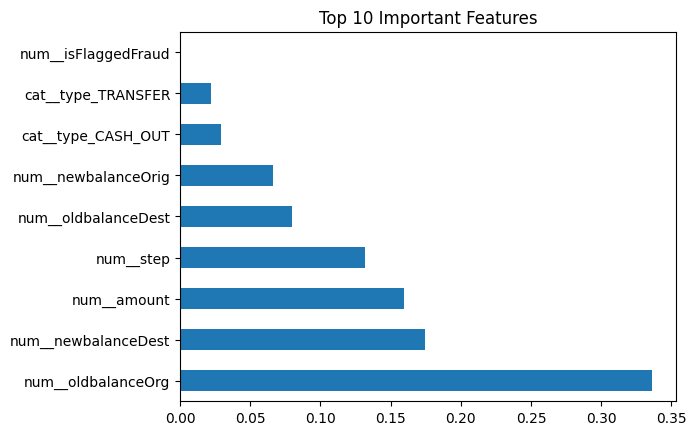

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = preprocessor.get_feature_names_out()

feature_importances = pd.Series(model.feature_importances_, index=feature_names)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

To evaluate the performance of our Random Forest classifier, we plot the ROC (Receiver Operating Characteristic) curve and compute the AUC (Area Under the Curve) score.

The ROC curve illustrates the model’s diagnostic ability by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. A model with an AUC closer to 1.0 is considered to have excellent discrimination capabilities between the classes.

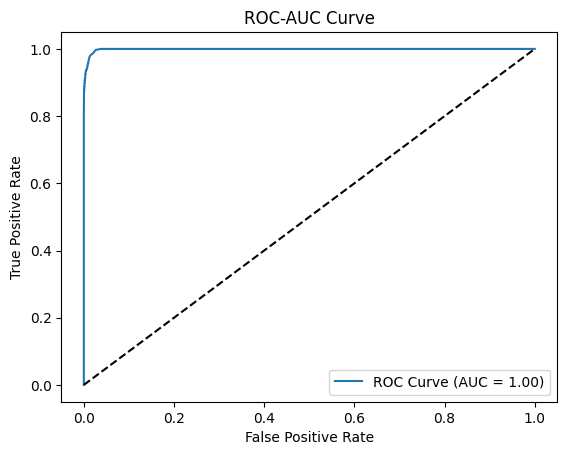

In [37]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()


To further evaluate the performance of the trained Random Forest classifier, we use the confusion matrix and classification report. These metrics provide a detailed breakdown of how well the model performed on the test set.

The confusion matrix shows the counts of:

True Positives (TP)

True Negatives (TN)

False Positives (FP)

False Negatives (FN)

The classification report includes:

Precision: How many predicted positives are actually positive.

Recall (Sensitivity): How many actual positives are correctly predicted.

F1-score: Harmonic mean of precision and recall.

Support: Number of true instances for each class.

python
Copy code


In [38]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Confusion Matrix:
[[130222    140]
 [    36    283]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    130362
         1.0       0.67      0.89      0.76       319

    accuracy                           1.00    130681
   macro avg       0.83      0.94      0.88    130681
weighted avg       1.00      1.00      1.00    130681



The Random Forest model, when trained on a SMOTE-balanced dataset, achieved strong performance in detecting fraudulent transactions. The combination of classification metrics, ROC-AUC score, and feature importance visualization provides confidence in the model’s predictive power. Future improvements could involve hyperparameter tuning and testing with other advanced models like XGBoost.